# **ANSERING QUESTION 4**
---

## **IMPORT**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ĐỌC DỮ LIỆU**

In [2]:
df = pd.read_csv('../Data/movie_data.csv')
df.head(5)

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action/Adventure,Animation,Biography/History/War,...,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12398.815824,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,True,False,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,True,False,True,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,False,False,False,False,False,False,True,0.0,0.0,1


## **CÂU 4: Thời lượng phim (Runtime) ảnh hưởng như thế nào đến số lượng IMDb Votes và IMDb Rating?**

### **4.1. Tiền xử lý**

Phân thời lượng phim thành ba nhóm chính:

- Phim ngắn (Short): Các bộ phim có thời lượng dưới 80 phút.
- Phim trung bình (Medium): Các bộ phim có thời lượng từ 80 đến 120 phút.
- Phim dài (Long): Các bộ phim có thời lượng trên 120 phút.

In [3]:
# Phân nhóm thời lượng
df['Runtime Group'] = pd.cut(df['Runtime'], bins=[0, 80, 120, float('inf')], 
                               labels=['Short', 'Medium', 'Long'])

### **4.2. Trực quan hóa dữ liệu**

- Phân phối thời lượng phim: sử dụng biểu đồ histogram kết hợp với đường biểu diễn phân phối xác suất (KDE). Biểu đồ này giúp hình dung được tần suất xuất hiện của các khoảng thời gian chiếu phim trong dữ liệu. 

- Sự khác biệt trong số lượng IMDb Votes và IMDb Rating theo nhóm thời lượng phim: sử dụng biểu đồ barplot với các nhóm thời lượng phim (Short, Medium, Long). Biểu đồ này giúp làm rõ mối quan hệ giữa thời lượng phim và mức độ tương tác (votes, rating) của người xem. Ta có thể thấy rõ ràng sự khác biệt trong số lượng votes trung bình và điểm rating trung bình giữa các nhóm thời lượng phim.

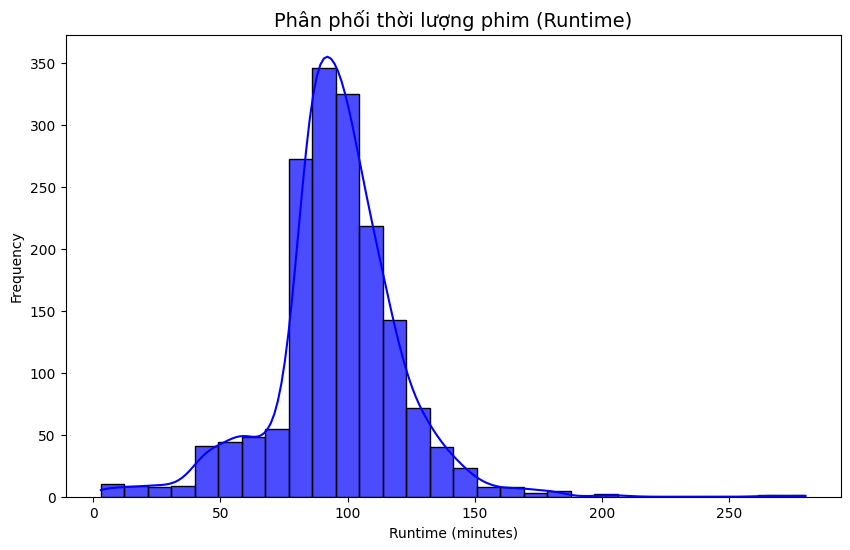

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Phân phối thời lượng phim (Runtime)', fontsize=14)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**Nhận xét:**
- Phân phối thời lượng phim có dạng lệch phải, tập trung chủ yếu trong khoảng 80–120 phút và giảm dần về phía thời lượng lớn hơn.

- Đa số các bộ phim có thời lượng xung quanh 80–120 phút. Điều này phản ánh đây là khoảng thời gian thường được các nhà làm phim lựa chọn để cân bằng giữa việc phát triển nội dung và giữ sự tập trung của khán giả.

- Có một số phim có thời lượng rất ngắn (dưới 50 phút) hoặc rất dài (trên 150 phút), nhưng tần suất xuất hiện của chúng rất thấp.

Phần lớn các bộ phim thường có thời lượng từ 80 đến 120 phút. Đây là khoảng thời gian được coi là "chuẩn" cho một bộ phim, đủ để kể một câu chuyện mà không bị quá dài dòng.

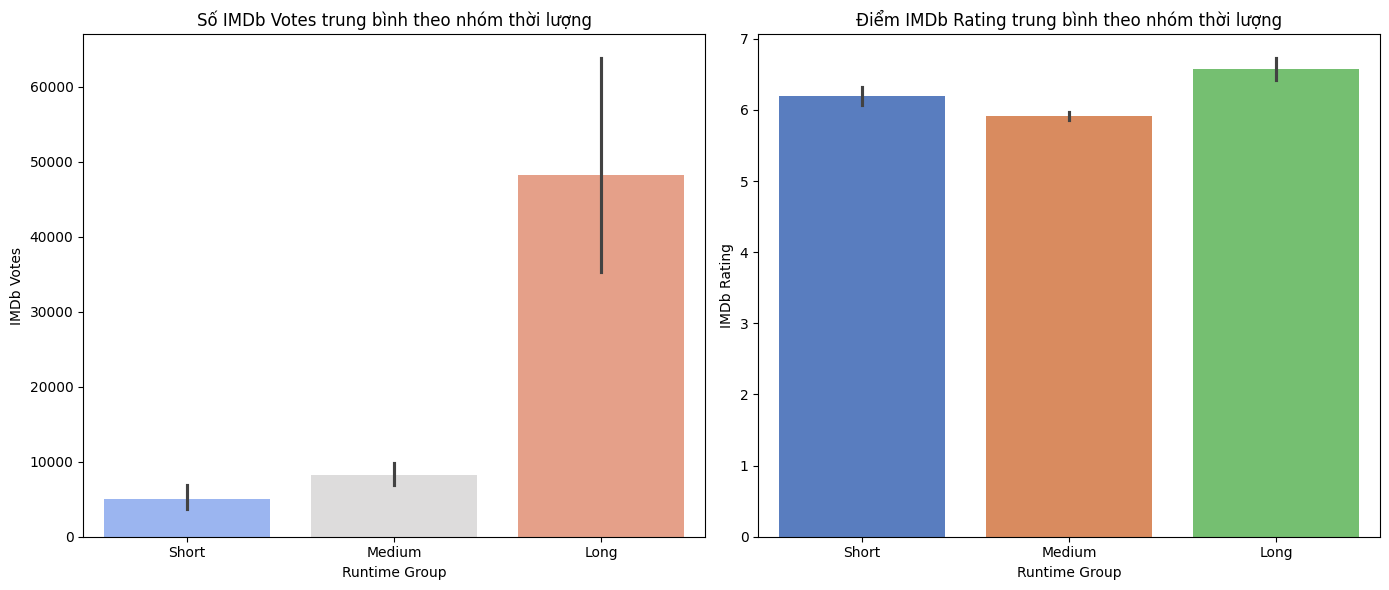

In [5]:
plt.figure(figsize=(14, 6))

# IMDb Votes theo nhóm thời lượng
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Runtime Group', y='IMDb Votes', hue='Runtime Group', palette='coolwarm')
plt.title('Số IMDb Votes trung bình theo nhóm thời lượng')
plt.xlabel('Runtime Group')
plt.ylabel('IMDb Votes')

# IMDb Rating theo nhóm thời lượng
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Runtime Group', y='IMDb Rating', hue='Runtime Group', palette='muted')
plt.title('Điểm IMDb Rating trung bình theo nhóm thời lượng')
plt.xlabel('Runtime Group')
plt.ylabel('IMDb Rating')

plt.tight_layout()
plt.show()


**Nhận xét:**
- IMDb Votes:
Nhóm "Long" (thời lượng > 120 phút) có số lượt bình chọn cao nhất, vượt xa so với nhóm "Medium" và "Short". Cho thấy rằng những bộ phim dài hơn thường thu hút được sự quan tâm nhiều hơn từ khán giả. Lý do có thể là các phim dài thường được đầu tư hơn về nội dung, sản xuất và có khả năng thuộc các thể loại nổi bật như hành động, sử thi hoặc phim kinh điển.

- IMDb Rating:
Nhóm "Long" cũng có điểm đánh giá cao nhất, cao hơn đáng kể so với nhóm "Medium" và "Short". Điều này cho thấy các phim dài thường được đánh giá tốt hơn, có thể do khả năng phát triển nhân vật, cốt truyện tốt hơn trong thời lượng dài hơn.

- Nhóm "Medium" và "Short":
Nhóm "Short" có IDMb Ratings cao hơn so với nhóm "Medium" nhưng nhóm "Medium" lại có IMDb Votes nhiều hơn nhóm "Short", cho thấy các bộ phim có thời lượng trung bình dễ tiếp cận và thu hút được lượng khán giả lớn hơn. Mặc dù vậy, điều này không đồng nghĩa với chất lượng tốt hơn, vì số lượng votes cao không nhất thiết phản ánh sự xuất sắc về mặt nội dung.

Phim dài (> 120 phút) dường như đạt được sự cân bằng giữa số lượng bình chọn và điểm đánh giá cao, nên có thể xem là thời lượng lý tưởng để thu hút cả sự quan tâm và sự hài lòng của khán giả. Điều này gợi ý rằng thời lượng dài thường giúp phim có không gian để phát triển cốt truyện và nhân vật chi tiết hơn, qua đó thu hút được sự quan tâm của khán giả cũng như đánh giá tích cực hơn. Tuy nhiên, việc sản xuất phim dài đòi hỏi đầu tư lớn và cần được xây dựng tốt để tránh nguy cơ làm giảm sự hứng thú của người xem.

### **4.3. Nhận xét**

- Từ góc nhìn khán giả (Votes & Rating):
Các phim có thời lượng trên 120 phút thường nhận được đánh giá cao hơn và lượt vote nhiều hơn. Điều này có thể do các bộ phim dài hơn thường là sản phầm có đầu tư lớn, nội dung phức tạp hơn như phim sử thi, khoa học viễn tưởng hoặc phim tiểu thuyết chuyển thể. Những bộ phim này thường thu hút sự chú ý của khán giả và nhận được đánh giá cao từ người xem.

- Từ góc độ phổ biến:
Tuy nhiên, phần lớn phim được sản xuất có thời lượng trong khoảng 80-120 phút, vì đây là mức thời gian hợp lý để giữ sự tập trung của khán giả đại chúng và đáp ứng nhu cầu xem phim nhanh chóng và tiện lợi.

**Kết luận:**

- Với phim hướng tới chất lượng cao và khán giả yêu thích phim chuyên sâu: Thời lượng lý tưởng sẽ là trên 120 phút. Các bộ phim này thường mang lại những trải nghiệm sâu sắc và thường xuyên là các tác phẩm nghệ thuật với nội dung đa chiều.

- Với phim thương mại phổ thông: Thời lượng lý tưởng cho các bộ phim này là 80-120 phút, giúp cân bằng giữa độ dài vừa phải và nội dung hấp dẫn, dễ dàng thu hút một lượng lớn khán giả.

- Tùy thuộc vào thể loại và đối tượng khán giả:
Phim sử thi, khoa học viễn tưởng hoặc chính kịch có xu hướng phù hợp hơn với thời lượng dài trên 120 phút.
Phim hài, hành động hoặc gia đình thường được tối ưu hóa trong khoảng 90-120 phút để phù hợp với tính chất nhẹ nhàng và dễ tiếp cận.
